LOADING DATASET

In [20]:
# Import necessary libraries
import pandas as pd

# Load the dataset
df = pd.read_csv('raw_merged_heart_dataset.csv')

# Display basic information and first few rows
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2181 entries, 0 to 2180
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2181 non-null   int64  
 1   sex       2181 non-null   int64  
 2   cp        2181 non-null   int64  
 3   trestbps  2181 non-null   object 
 4   chol      2181 non-null   object 
 5   fbs       2181 non-null   object 
 6   restecg   2181 non-null   object 
 7   thalachh  2181 non-null   object 
 8   exang     2181 non-null   object 
 9   oldpeak   2181 non-null   float64
 10  slope     2181 non-null   object 
 11  ca        2181 non-null   object 
 12  thal      2181 non-null   object 
 13  target    2181 non-null   int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 238.7+ KB


(None,
    age  sex  cp trestbps chol fbs restecg thalachh exang  oldpeak slope ca  \
 0   63    1   3      145  233   1       0      150     0      2.3     0  0   
 1   37    1   2      130  250   0       1      187     0      3.5     0  0   
 2   41    0   1      130  204   0       0      172     0      1.4     2  0   
 3   56    1   1      120  236   0       1      178     0      0.8     2  0   
 4   57    0   0      120  354   0       1      163     1      0.6     2  0   
 
   thal  target  
 0    1       1  
 1    2       1  
 2    2       1  
 3    2       1  
 4    2       1  )

In [21]:
# !pip install pandas

DATA CLEANING AND TYPE CONVERSION

In [22]:
# Convert object columns to numeric where applicable
for col in ['trestbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exang', 'slope', 'ca', 'thal']:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric, setting errors to NaN

# Check if any NaN values appeared after conversion
missing_values = df.isnull().sum()
df.info(), missing_values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2181 entries, 0 to 2180
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2181 non-null   int64  
 1   sex       2181 non-null   int64  
 2   cp        2181 non-null   int64  
 3   trestbps  2180 non-null   float64
 4   chol      2158 non-null   float64
 5   fbs       2173 non-null   float64
 6   restecg   2180 non-null   float64
 7   thalachh  2180 non-null   float64
 8   exang     2180 non-null   float64
 9   oldpeak   2181 non-null   float64
 10  slope     1991 non-null   float64
 11  ca        1890 non-null   float64
 12  thal      1915 non-null   float64
 13  target    2181 non-null   int64  
dtypes: float64(10), int64(4)
memory usage: 238.7 KB


(None,
 age           0
 sex           0
 cp            0
 trestbps      1
 chol         23
 fbs           8
 restecg       1
 thalachh      1
 exang         1
 oldpeak       0
 slope       190
 ca          291
 thal        266
 target        0
 dtype: int64)

HANDLING MISSING VALUES

In [23]:
# Fill missing values for numerical columns with median
for col in ['trestbps', 'chol', 'thalachh', 'fbs', 'restecg', 'exang']:
    df[col].fillna(df[col].median(), inplace=True)

# Fill missing values for categorical columns with mode
for col in ['slope', 'ca', 'thal']:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Verify if all missing values are handled
df.isnull().sum()


C:\Users\Jaganath\AppData\Local\Temp\ipykernel_7720\4240724949.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\Jaganath\AppData\Local\Temp\ipykernel_7720\4240724949.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalachh    0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

DATA PREPROCESSSING AND FEATURE SCALING

In [24]:
from sklearn.preprocessing import StandardScaler

# Separate features (X) and target (y)
X = df.drop(columns=['target'])
y = df['target']

# Apply StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for compatibility
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Verify scaling effect
X_scaled.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal
count,2.181000e+03,2.181000e+03,2.181000e+03,2.181000e+03,2.181000e+03,2.181000e+03,2.181000e+03,2.181000e+03,2.181000e+03,2.181000e+03,2.181000e+03,2.181000e+03,2.181000e+03
mean,2.997246e-16,7.330221e-17,2.606301e-17,6.124807e-16,1.844772e-16,3.257876e-17,-2.280513e-17,3.909451e-16,4.561026e-17,-9.122053e-17,-1.172835e-16,-1.303150e-17,1.303150e-16
std,1.000229e+00,1.000229e+00,1.000229e+00,1.000229e+00,1.000229e+00,1.000229e+00,1.000229e+00,1.000229e+00,1.000229e+00,1.000229e+00,1.000229e+00,1.000229e+00,1.000229e+00
min,-2.771527e+00,-1.503359e+00,-1.099392e+00,-2.259953e+00,-3.028156e+00,-3.993615e-01,-8.660778e-01,-3.305319e+00,-6.976443e-01,-8.676583e-01,-2.450182e+00,-6.479887e-01,-2.109035e+00
25%,-8.134476e-01,-1.503359e+00,-1.099392e+00,-6.651896e-01,-6.774210e-01,-3.993615e-01,-8.660778e-01,-6.890472e-01,-6.976443e-01,-8.676583e-01,-8.104622e-01,-6.479887e-01,-4.978948e-01
50%,5.681015e-02,6.651769e-01,3.591079e-01,-9.563146e-02,-9.906573e-02,-3.993615e-01,-8.660778e-01,1.258570e-01,-6.976443e-01,-3.420750e-01,8.292577e-01,-6.479887e-01,-4.978948e-01
75%,7.095034e-01,6.651769e-01,3.591079e-01,4.739267e-01,5.352595e-01,-3.993615e-01,7.185830e-01,7.263127e-01,1.433395e+00,5.338972e-01,8.292577e-01,3.753736e-01,3.076754e-01
max,2.558801e+00,6.651769e-01,1.817607e+00,3.891276e+00,6.635975e+00,2.503997e+00,2.303244e+00,2.313231e+00,1.433395e+00,4.563369e+00,2.468978e+00,3.445461e+00,3.529956e+00


FEATURE SELECTION

In [25]:
from sklearn.feature_selection import SelectKBest, f_classif

# Select the best features
selector = SelectKBest(score_func=f_classif, k=13)
X_selected = selector.fit_transform(X_scaled, y)

# Get selected feature names
selected_features = X_scaled.columns[selector.get_support()]
selected_features


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

TRAIN-TEST SPLIT

In [26]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled[selected_features], y, test_size=0.2, random_state=42, stratify=y
)

# Verify shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1744, 13), (437, 13), (1744,), (437,))

In [27]:
# !pip install scikit-learn xgboost matplotlib seaborn lightgbm catboost

In [28]:
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
import lightgbm as lgb
import catboost as ct
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score
s=[]

SVM CLASSIFIER MODEL

In [29]:
import sklearn.svm as svm

y_pred = svm.SVC(kernel='linear').fit(X_train, y_train).predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.4f}')

f1score = f1_score(y_test, y_pred)
print(f'F1_Score: {f1score:.4f}')

recallscore = recall_score(y_test, y_pred)
print(f'Recall_Score: {recallscore:.4f}')
# Append results to the list
s.append(['SVM',accuracy,precision,f1score,recallscore])

Accuracy: 0.6773
Precision: 0.6348
F1_Score: 0.7174
Recall_Score: 0.8249


ADABOOST CLASSIFIER MODEL

In [30]:
#AdaBoost Algorithm
adaboost = AdaBoostClassifier(n_estimators=50, random_state=42)

# Train the AdaBoost classifier
adaboost.fit(X_train, y_train)

# Predict on the test set
y_pred = adaboost.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.4f}')

f1score = f1_score(y_test, y_pred)
print(f'F1_Score: {f1score:.4f}')

recallscore = recall_score(y_test, y_pred)
print(f'Recall_Score: {recallscore:.4f}')

s.append(['AdaBoost',accuracy,precision,f1score,recallscore])

Accuracy: 0.7140
Precision: 0.7091
F1_Score: 0.7140
Recall_Score: 0.7189


In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import os
import matplotlib.pyplot as plt

notebook_images = 'notebook_images'
os.makedirs(notebook_images, exist_ok=True)

cm = confusion_matrix(y_test, y_pred)

# Plot using Seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap=["black","blue"], xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])

# Labels & Formatting
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")


plt.savefig(os.path.join(notebook_images, 'ada_confusion_matrix.png'))
plt.close()
plt.show()

CATBOOST CLASSIFIER MODEL

In [32]:
catboost_model = ct.CatBoostClassifier(iterations=500, learning_rate=0.1, depth=6, verbose=200)

# Train the model
catboost_model.fit(X_train, y_train)

# Make predictions
y_pred = catboost_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.4f}')

f1score = f1_score(y_test, y_pred)
print(f'F1_Score: {f1score:.4f}')

recallscore = recall_score(y_test, y_pred)
print(f'Recall_Score: {recallscore:.4f}')
s.append(['CatBoost',accuracy,precision,f1score,recallscore])

0:	learn: 0.6132036	total: 3.12ms	remaining: 1.56s
200:	learn: 0.0458185	total: 572ms	remaining: 850ms
400:	learn: 0.0150755	total: 1.19s	remaining: 293ms
499:	learn: 0.0103846	total: 1.44s	remaining: 0us
Accuracy: 0.9108
Precision: 0.8904
F1_Score: 0.9124
Recall_Score: 0.9355


XGBOOST CLASSIFIER MODEL

In [33]:
xg = xgb.XGBClassifier()

xg.fit(X_train,y_train)

y_pred = xg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.4f}')

f1score = f1_score(y_test, y_pred)
print(f'F1_Score: {f1score:.4f}')

recallscore = recall_score(y_test, y_pred)
print(f'Recall_Score: {recallscore:.4f}')
s.append(['XgBoost',accuracy,precision,f1score,recallscore])

Accuracy: 0.9130
Precision: 0.8978
F1_Score: 0.9140
Recall_Score: 0.9309


CLASSIFIER TABLE

In [34]:
data = pd.DataFrame(sorted(s),columns=['Model','Accuracy ','Precision','F1 Score','Recall Score'])
print(data)

      Model  Accuracy   Precision  F1 Score  Recall Score
0  AdaBoost   0.713959   0.709091  0.713959      0.718894
1  CatBoost   0.910755   0.890351  0.912360      0.935484
2       SVM   0.677346   0.634752  0.717435      0.824885
3   XgBoost   0.913043   0.897778  0.914027      0.930876


STACKING CLASSIFIER OR HYBRID MODEL

In [35]:
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier

# Optimized CatBoost Model
catboost_model = CatBoostClassifier(
    iterations=500, depth=8, learning_rate=0.05, verbose=0
)

# Optimized XGBoost Model
xgb_model = xgb.XGBClassifier(
    n_estimators=500, max_depth=8, learning_rate=0.05, objective='binary:logistic'
)

# Optimized SVM Model
svm_model = SVC(kernel='linear', probability=True, C=1.0)

# Stacking Classifier with Logistic Regression as Final Estimator
from sklearn.linear_model import LogisticRegression

stacking_model = StackingClassifier(
    estimators=[
        ('catboost', catboost_model),
        ('xgb', xgb_model),
        ('svm', svm_model)
    ],
    final_estimator=RandomForestClassifier(n_estimators=500, max_depth=10, random_state=42)
)

# Train the stacking model
stacking_model.fit(X_train, y_train)

# Make predictions
y_pred = stacking_model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.4f}')

f1score = f1_score(y_test, y_pred)
print(f'F1_Score: {f1score:.4f}')

recallscore = recall_score(y_test, y_pred)
print(f'Recall_Score: {recallscore:.4f}')

s.append(['Stacking',accuracy,precision,f1score,recallscore])

Accuracy: 0.9245
Precision: 0.9340
F1_Score: 0.9231
Recall_Score: 0.9124


INPUT SECTION

In [36]:
# import numpy as np
# def classify_heart_disease(age, sex, cp, trestbps, chol, fbs, restecg, thalachh, exang, oldpeak, slope, ca, thal):

#     input_data = np.array([[age, sex, cp, trestbps, chol, fbs, restecg, thalachh, exang, oldpeak, slope, ca, thal]])

#     prediction = stacking_model.predict(input_data)

#     return "Heart Disease" if prediction[0] == 1 else "No Heart Disease"

# age = int(input())
# sex = int(input())  # Male (0 for female, 1 for male)
# cp = int(input())  # Type of chest pain
# trestbps = int(input())  # Resting blood pressure
# chol = int(input())  # Cholesterol level
# fbs = int(input())  # Fasting blood sugar (1 if > 120 mg/dl, else 0)
# restecg = int(input())  # Resting electrocardiographic results
# thalachh = int(input())  # Maximum heart rate achieved
# exang = int(input()) # Exercise induced angina (0 for no, 1 for yes)
# oldpeak = int(input())  # Depression induced by exercise relative to rest
# slope = int(input())  # Slope of the peak exercise ST segment
# ca = int(input())  # Number of major vessels colored by fluoroscopy
# thal = int(input())  # Thalassemia (3 = normal, 6 = fixed defect, 7 = reversable defect)

# # Make prediction
# result = classify_heart_disease(age, sex, cp, trestbps, chol, fbs, restecg, thalachh, exang, oldpeak, slope, ca, thal)
# print(result)

In [37]:
data = pd.DataFrame(sorted(s),columns=['Model','Accuracy ','Precision','F1 Score','Recall Score'])
print(data)

      Model  Accuracy   Precision  F1 Score  Recall Score
0  AdaBoost   0.713959   0.709091  0.713959      0.718894
1  CatBoost   0.910755   0.890351  0.912360      0.935484
2       SVM   0.677346   0.634752  0.717435      0.824885
3  Stacking   0.924485   0.933962  0.923077      0.912442
4   XgBoost   0.913043   0.897778  0.914027      0.930876


DATA VISUALIZATION

Accuracy Growth 

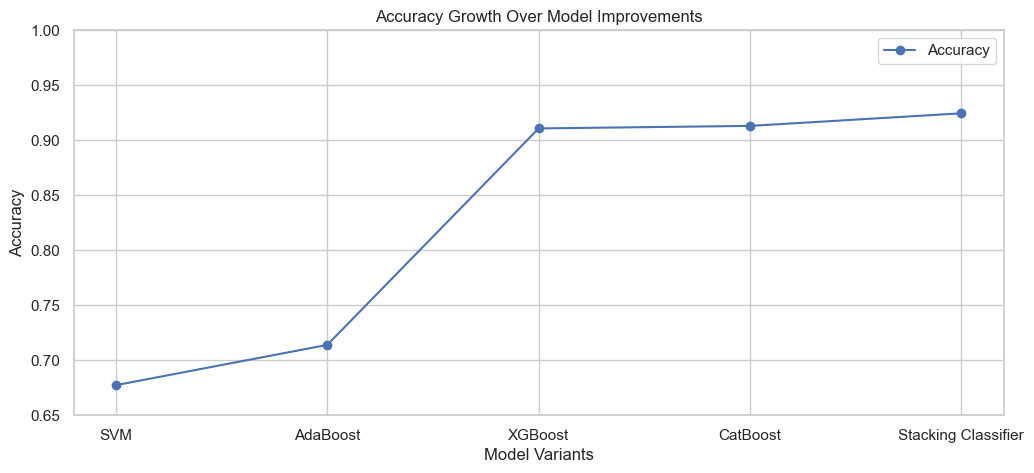

In [45]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import os

# Create the output directory if not exists
notebook_images = 'notebook_images'
os.makedirs(notebook_images, exist_ok=True)

# Define model names
models = ['SVM', 'AdaBoost', 'XGBoost', 'CatBoost', 'Stacking Classifier']

# Example values (replace these with your actual metrics)
accuracy = []
precision = []
recall = []
f1_score_values = []
for i in s:
    accuracy.append(i[1])
    precision.append(i[2])
    recall.append(i[3])
    f1_score_values.append(i[4]) 

# --- Plot Accuracy Growth ---
plt.figure(figsize=(12, 5))
plt.plot(models, accuracy, marker='o', linestyle='-', color='b', label="Accuracy")
plt.xlabel("Model Variants")
plt.ylabel("Accuracy")
plt.title("Accuracy Growth Over Model Improvements")
plt.ylim(0.65, 1.0)  # Set limits for better visualization
plt.grid(True)
plt.legend()

plt.savefig(os.path.join('notebook_images/accuracy_growth.png'))

plt.show()

# --- Plot Precision, Recall, and F1-Score Comparison --



Model with Metric Comparisions

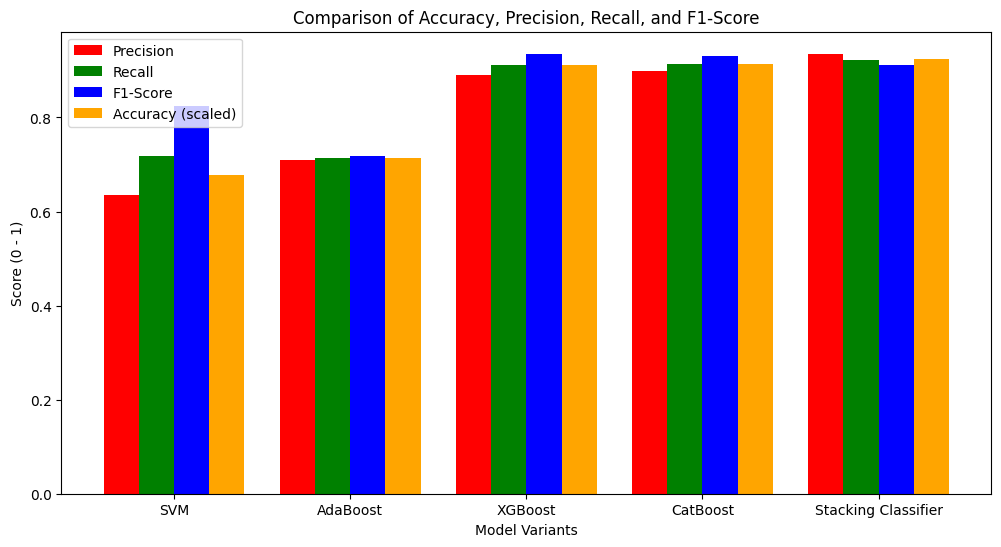

In [39]:
import os

# Create the output directory if not exists
notebook_images = 'notebook_images'
os.makedirs(notebook_images, exist_ok=True)

x = np.arange(len(models))
width = 0.2  

# Create the bar chart
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(x - 1.5 * width, precision, width, label="Precision", color='r')
ax.bar(x - 0.5 * width, recall, width, label="Recall", color='g')
ax.bar(x + 0.5 * width, f1_score_values, width, label="F1-Score", color='b')
ax.bar(x + 1.5 * width, accuracy, width, label="Accuracy (scaled)", color='orange')

# Labels & formatting
ax.set_xlabel("Model Variants")
ax.set_ylabel("Score (0 - 1)")
ax.set_title("Comparison of Accuracy, Precision, Recall, and F1-Score")
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Save the plot as an image in the correct directory
plt.savefig(os.path.join(notebook_images, 'metrics_comparison.png'))
plt.show()

Confusion Matrix of the Dataset

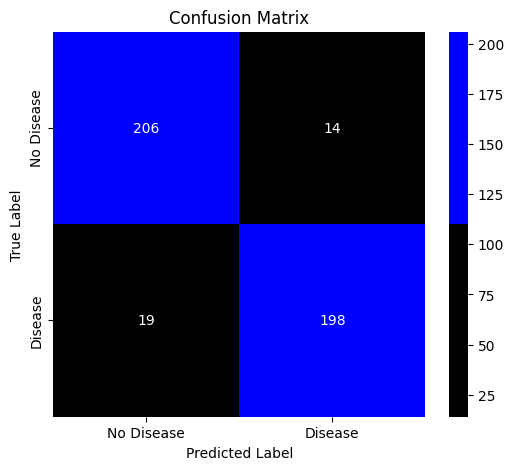

In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

import os

# Create the output directory if not exists
notebook_images = 'notebook_images'
os.makedirs(notebook_images, exist_ok=True)

cm = confusion_matrix(y_test, y_pred)

# Plot using Seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap=["black","blue"], xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])

# Labels & Formatting
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

plt.savefig(os.path.join(notebook_images, 'stacking_confusion_matrix.png'))

plt.show()

Training and Testing Data Comparision

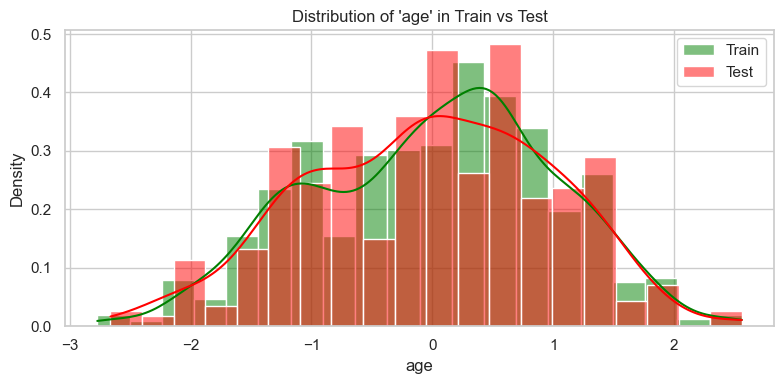

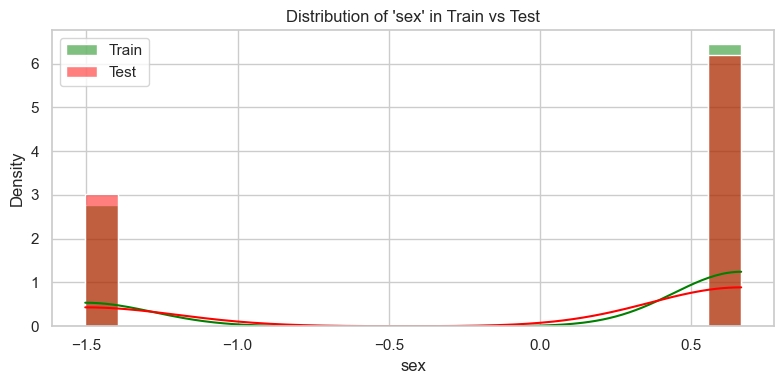

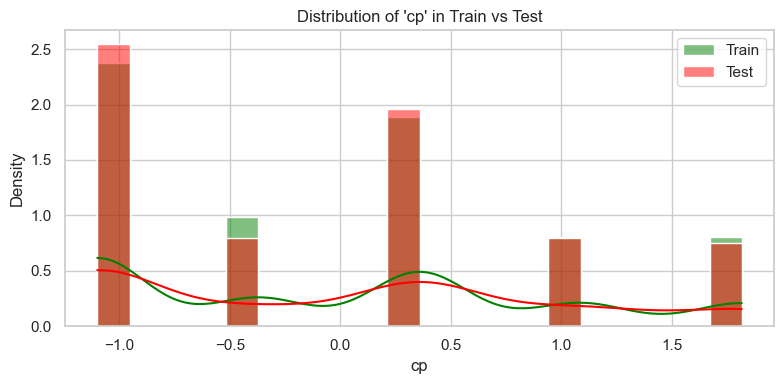

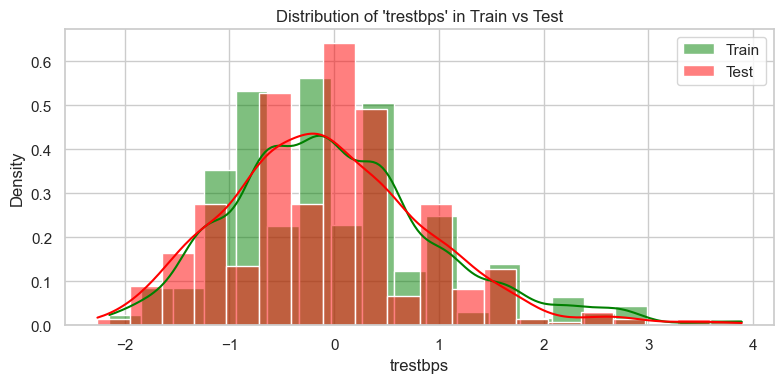

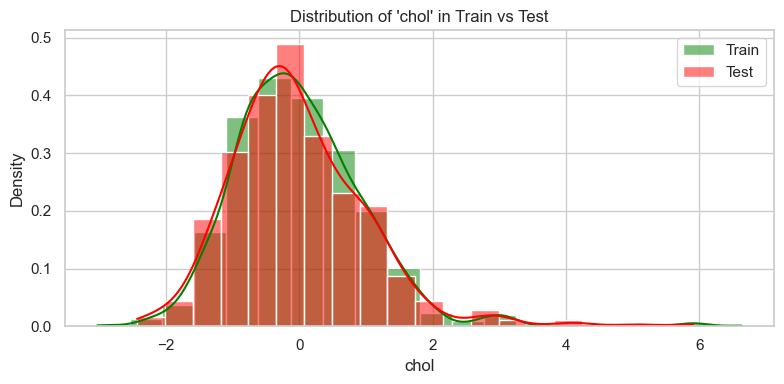

C:\Users\Jaganath\AppData\Local\Temp\ipykernel_7720\247468010.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined_df, x='Dataset', y=feature, palette='Set2')


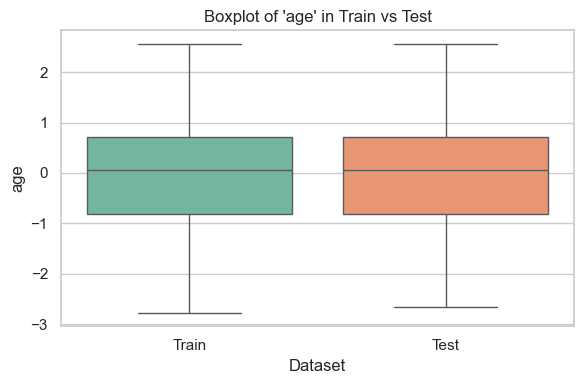

C:\Users\Jaganath\AppData\Local\Temp\ipykernel_7720\247468010.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined_df, x='Dataset', y=feature, palette='Set2')


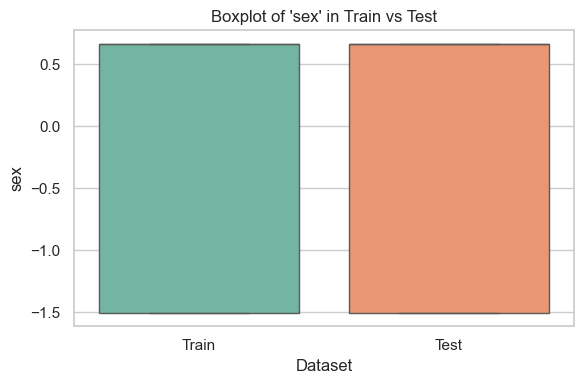

C:\Users\Jaganath\AppData\Local\Temp\ipykernel_7720\247468010.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined_df, x='Dataset', y=feature, palette='Set2')


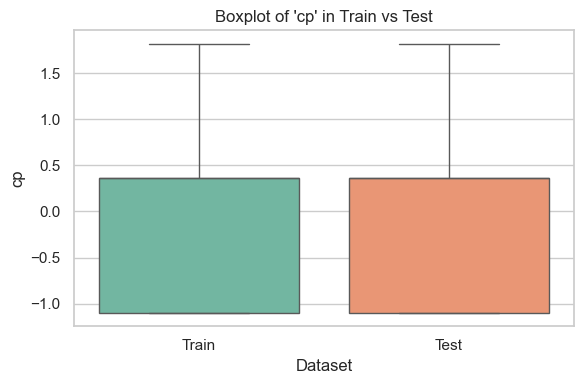

C:\Users\Jaganath\AppData\Local\Temp\ipykernel_7720\247468010.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined_df, x='Dataset', y=feature, palette='Set2')


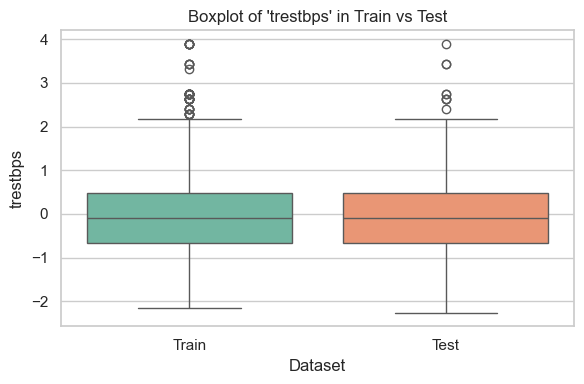

C:\Users\Jaganath\AppData\Local\Temp\ipykernel_7720\247468010.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined_df, x='Dataset', y=feature, palette='Set2')


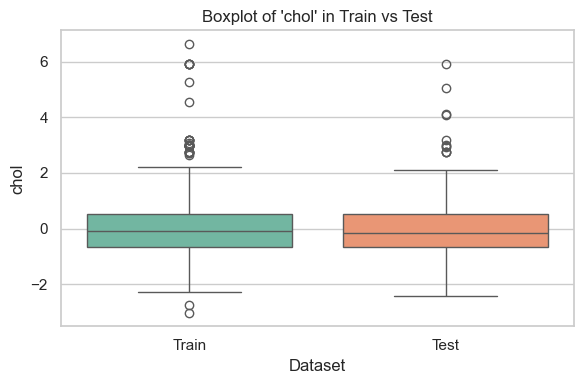

C:\Users\Jaganath\AppData\Local\Temp\ipykernel_7720\247468010.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Train Accuracy', 'Test Accuracy'], y=[train_acc, test_acc], palette='coolwarm')


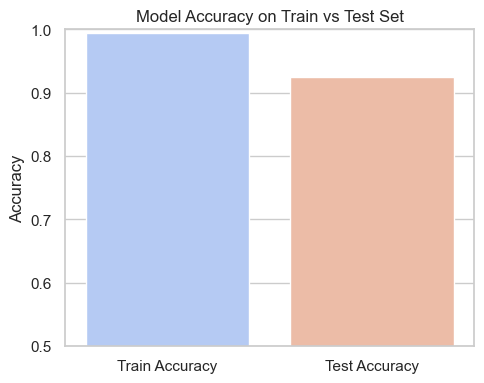

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style
sns.set(style="whitegrid")

# 🟢 1. Histogram Comparison of Selected Features
def plot_feature_distributions(X_train, X_test, features, bins=20):
    for feature in features:
        plt.figure(figsize=(8, 4))
        sns.histplot(X_train[feature], color='green', label='Train', kde=True, bins=bins, stat='density')
        sns.histplot(X_test[feature], color='red', label='Test', kde=True, bins=bins, stat='density')
        plt.title(f"Distribution of '{feature}' in Train vs Test")
        plt.xlabel(feature)
        plt.ylabel('Density')
        plt.legend()
        plt.tight_layout()
        plt.show()

# Example usage (top 5 features)
top_features = selected_features[:5]  # or use list of your choice
plot_feature_distributions(X_train, X_test, top_features)

# 📦 2. Box Plot Comparison
def boxplot_comparison(X_train, X_test, features):
    for feature in features:
        combined_df = pd.DataFrame({
            feature: pd.concat([X_train[feature], X_test[feature]]),
            'Dataset': ['Train'] * len(X_train) + ['Test'] * len(X_test)
        })
        plt.figure(figsize=(6, 4))
        sns.boxplot(data=combined_df, x='Dataset', y=feature, palette='Set2')
        plt.title(f"Boxplot of '{feature}' in Train vs Test")
        plt.tight_layout()
        plt.show()

boxplot_comparison(X_train, X_test, top_features)

# 🧠 3. Accuracy Bar Chart
from sklearn.metrics import accuracy_score

train_pred = stacking_model.predict(X_train)
test_pred = stacking_model.predict(X_test)

train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)

# Accuracy Comparison
plt.figure(figsize=(5, 4))
sns.barplot(x=['Train Accuracy', 'Test Accuracy'], y=[train_acc, test_acc], palette='coolwarm')
plt.ylim(0.5, 1.0)
plt.title("Model Accuracy on Train vs Test Set")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()


In [42]:
import joblib


model_filename = 'model.pkl'
joblib.dump(stacking_model, model_filename)

print(f"Model saved as {model_filename}")

Model saved as model.pkl
